In [12]:
import sys

sys.executable

import numpy as np
import pandas as pd
# from numpy import cos, sin, pi
# from scipy.optimize import minimize, fmin
import pandas as pd
import os
package_path = '../'
if package_path is not None:
    os.sys.path.append(package_path)

    
import json,yaml
import matplotlib.pyplot as plt
from time import sleep
from tqdm import tqdm
# from tqdm import tqdm_notebook as tqdm

import matplotlib
%matplotlib inline

# some setting for the plots
font = {
#     'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('lines', linewidth=2)
matplotlib.rc('font', **font)


# auto reload external files, so that we can edit the external .py file and inmediately see the changes here
%load_ext autoreload
%autoreload 2


from frozen_dipole_model import frozen_dipole_model, dissipation, thinfilm_superconductor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
sys.executable

'/Applications/anaconda3/bin/python'

In [78]:
import sys

# [path for path in  sys.path if 'pylabcontrol' in path][0]
sys.path

['',
 '/Applications/anaconda3/lib/python36.zip',
 '/Applications/anaconda3/lib/python3.6',
 '/Applications/anaconda3/lib/python3.6/lib-dynload',
 '/Applications/anaconda3/lib/python3.6/site-packages',
 '/Applications/anaconda3/lib/python3.6/site-packages/aeosa',
 '/Applications/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/rettentulla/.ipython',
 '../',
 '../',
 '../',
 '../']

In [67]:
import site; site.getsitepackages()

['/Applications/anaconda3/lib/python3.6/site-packages']

Text(0,0.5,'damping $\\gamma/2\\pi$ (Hz)')

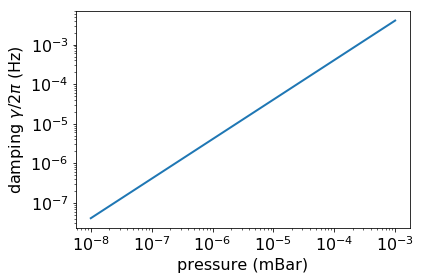

In [10]:
pressure = np.logspace(-8, -3,30)

plt.loglog(pressure, dissipation.gas_damping(Pgas = dissipation.millibar_to_pascals(pressure))/(2*np.pi))

plt.xlabel('pressure (mBar)')
plt.ylabel('damping $\gamma/2\pi$ (Hz)')

In [22]:
radius = np.linspace(0.1, 20, 20)*1e-6
min_dist = thinfilm_superconductor.vortex_creation_minimal_distance(radius=radius)  # minim distance to  create a vortex in mu

Text(0,0.5,'min distance to create vortex (um)')

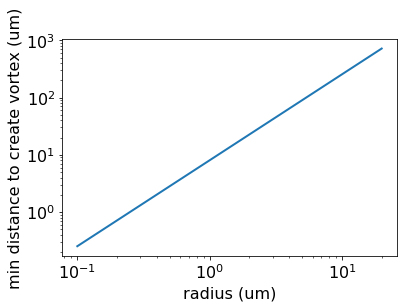

In [27]:
plt.loglog(radius*1e6, min_dist*1e6)

plt.xlabel('radius (um)')
plt.ylabel('min distance to create vortex (um)')

In [59]:
default_physical_parameters = frozen_dipole_model.default_physical_parameters
radius = default_physical_parameters['radius']
fluxquantum = default_physical_parameters['fluxquantum']
Br = default_physical_parameters['Br']
vacuum_permeability = default_physical_parameters['vacuum_permeability']
london_penetration_depth = default_physical_parameters['london_penetration_depth']
film_thickness = default_physical_parameters['film_thickness']

density = default_physical_parameters['density']

L = london_penetration_depth**2 / film_thickness


volume = 4 * np.pi / 3 * radius ** 3
md = Br*volume/vacuum_permeability
mass = density*volume

dm = L
# dm = 0

In [60]:
zo = np.linspace(0.1, 2000, 20)*1e-6
zo = np.logspace(-7, -3, 20)


kint =3 * fluxquantum/ (2*np.pi) * md  / (zo+dm)**4

Text(0,0.5,'frequency (Hz)')

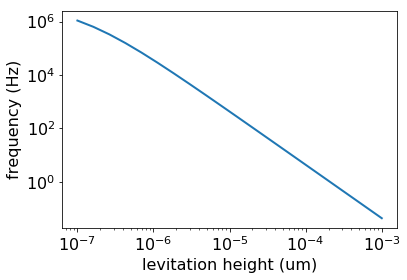

In [64]:
plt.loglog(zo, np.sqrt(kint/mass)/(2*np.pi))
# plt.loglog(zo, 1e-8/zo**2)

plt.xlabel('levitation height (um)')
plt.ylabel('frequency (Hz)')

In [48]:
zo

array([  1.00000000e-07,   1.62377674e-07,   2.63665090e-07,
         4.28133240e-07,   6.95192796e-07,   1.12883789e-06,
         1.83298071e-06,   2.97635144e-06,   4.83293024e-06,
         7.84759970e-06,   1.27427499e-05,   2.06913808e-05,
         3.35981829e-05,   5.45559478e-05,   8.85866790e-05,
         1.43844989e-04,   2.33572147e-04,   3.79269019e-04,
         6.15848211e-04,   1.00000000e-03])